<a href="https://colab.research.google.com/github/simonowuor8/datasciencecoursera/blob/main/Victor_Mmayi_Data_Analytics___Visualization_Notebook_File_007_(1)_(1)_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
#Load required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [5]:
!pip install pandas openpyxl

# **Loading Raw Data**

In [10]:
file_path = '/content/sample_data/predictive analysis_raw data (2).xlsx'   # Loading the excel file



In [11]:
df = pd.read_excel('/content/sample_data/predictive analysis_raw data (2).xlsx')  # Reading the excel file into dataframe

In [14]:
print(df.head())   # Display the first few rows of the dataframe

  STATISTIC     Statistic Label  TLIST(A1)  Year C02062V02489   Type of Meat  \
0  ABA06C01  Meat Slaughterings       2012  2012            -     Total Meat   
1  ABA06C01  Meat Slaughterings       2012  2012           01  Beef and veal   
2  ABA06C01  Meat Slaughterings       2012  2012           02       Pig meat   
3  ABA06C01  Meat Slaughterings       2012  2012           03     Sheep meat   
4  ABA06C01  Meat Slaughterings       2012  2012           04   Poultry meat   

         UNIT  VALUE  
0  000 Tonnes  923.0  
1  000 Tonnes  495.0  
2  000 Tonnes  241.0  
3  000 Tonnes   54.0  
4  000 Tonnes  132.0  


Frequency Table:
     Type of Meat  Total Value (000 Tonnes)  Percentage (%)
0  Beef and veal              35003.942498       47.734449
1       Pig meat              19430.282212       26.496839
2   Poultry meat              12260.909307       16.720052
3     Sheep meat               6635.433903        9.048660
4          Total              73330.567920      100.000000


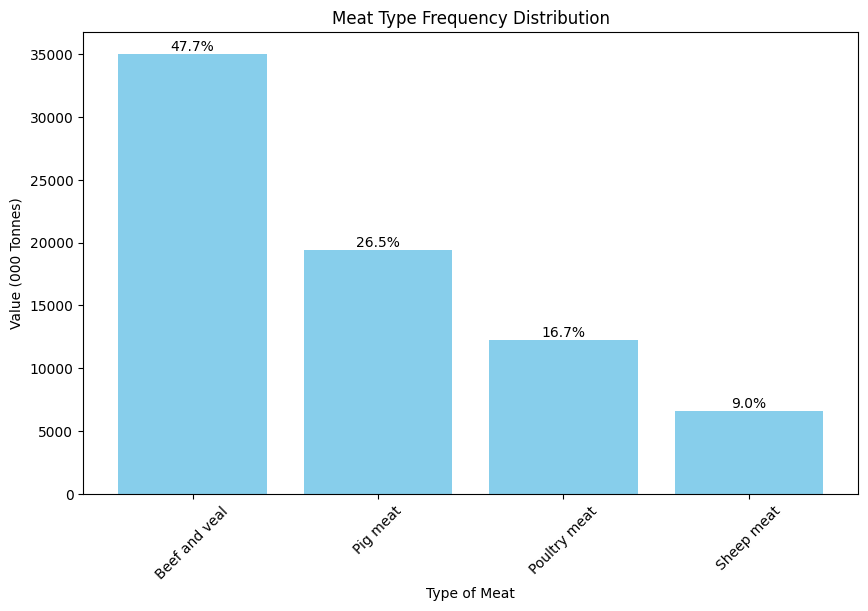

In [12]:
# Exclude 'Total Meat'
df_filtered = df[df['Type of Meat'] != 'Total Meat']

# Frequency Table with Sum and Percentage Frequency
frequency_table = df_filtered.groupby('Type of Meat')['VALUE'].sum().reset_index()
frequency_table.columns = ['Type of Meat', 'Total Value (000 Tonnes)']

# Calculate Total Value and Percentage
total_value = frequency_table['Total Value (000 Tonnes)'].sum()
frequency_table['Percentage (%)'] = (frequency_table['Total Value (000 Tonnes)'] / total_value) * 100

# Append Total Row
total_row = pd.DataFrame({'Type of Meat': ['Total'],
                          'Total Value (000 Tonnes)': [total_value],
                          'Percentage (%)': [100.0]})
frequency_table = pd.concat([frequency_table, total_row], ignore_index=True)

# Display Frequency Table
print("Frequency Table:\n", frequency_table)

# Bar Graph
plt.figure(figsize=(10, 6))
bars = plt.bar(frequency_table['Type of Meat'][:-1],  # Exclude 'Total' from graph
               frequency_table['Total Value (000 Tonnes)'][:-1],
               color='skyblue')

# Add Percentage Labels on Top of Bars
for bar, percentage in zip(bars, frequency_table['Percentage (%)'][:-1]):
    plt.text(bar.get_x() + bar.get_width() / 2,  # X-coordinate (center of bar)
             bar.get_height(),  # Y-coordinate (top of the bar)
             f'{percentage:.1f}%',  # Format percentage to 1 decimal place
             ha='center', va='bottom', fontsize=10)

# Customize Graph Labels and Title
plt.xlabel('Type of Meat')
plt.ylabel('Value (000 Tonnes)')
plt.title('Meat Type Frequency Distribution')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

Frequency Table:
                       Statistic Label  Total Value (000 Tonnes)  \
0  Human Consumption of Meat Products               1935.287469   
1                        Meat Exports              20737.907827   
2    Meat Gross Indigenous Production              25392.115966   
3                        Meat Imports               6127.651800   
4      Meat Products for Domestic Use               9324.794065   
5                  Meat Slaughterings              23930.050090   
6   Self Sufficiency in Meat Products              17571.026222   
7    Supplies = Uses of Meat Products              30064.701890   
8                               Total             135083.535330   

   Percentage (%)  
0        1.432660  
1       15.351914  
2       18.797343  
3        4.536194  
4        6.902983  
5       17.715001  
6       13.007526  
7       22.256378  
8      100.000000  


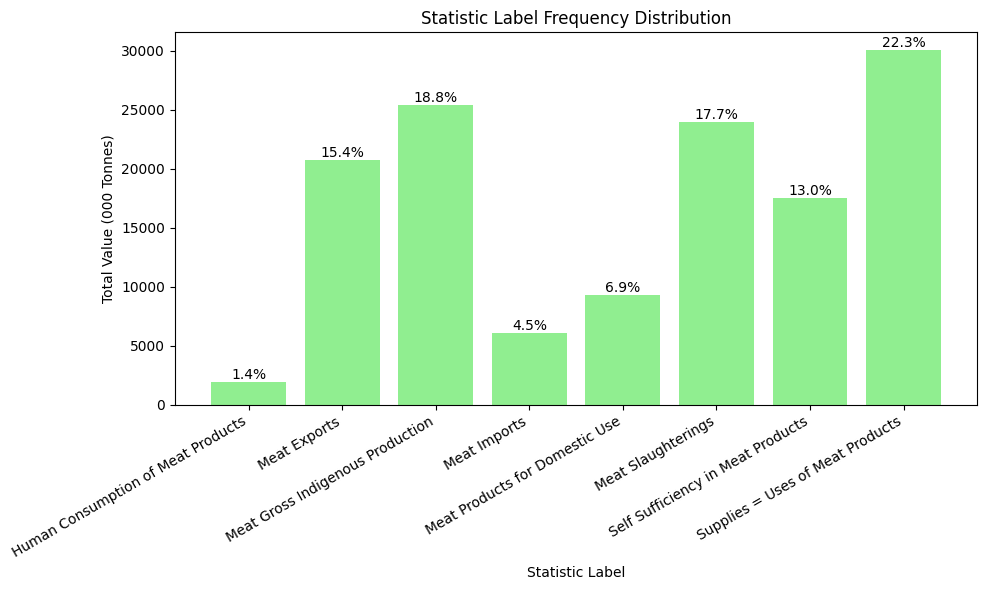

In [13]:
# Step 1: Drop rows with 'Variation in Meat Stock'
df_filtered = df[df['Statistic Label'] != 'Variation in Meat Stocks']

# Step 2: Group by 'Statistic Label' and calculate total values
stat_label_table = df_filtered.groupby('Statistic Label')['VALUE'].sum().reset_index()
stat_label_table.columns = ['Statistic Label', 'Total Value (000 Tonnes)']

# Step 3: Calculate total sum and percentage frequency
total_value = stat_label_table['Total Value (000 Tonnes)'].sum()
stat_label_table['Percentage (%)'] = (stat_label_table['Total Value (000 Tonnes)'] / total_value) * 100

# Step 4: Append a 'Total' row for completeness
total_row = pd.DataFrame({
    'Statistic Label': ['Total'],
    'Total Value (000 Tonnes)': [total_value],
    'Percentage (%)': [100.0]
})
stat_label_table = pd.concat([stat_label_table, total_row], ignore_index=True)

# Step 5: Display Frequency Table
print("Frequency Table:\n", stat_label_table)

# Step 6: Plot the Bar Graph for 'Statistic Label'
plt.figure(figsize=(10, 6))
bars = plt.bar(
    stat_label_table['Statistic Label'][:-1],  # Exclude 'Total' from the bar graph
    stat_label_table['Total Value (000 Tonnes)'][:-1],
    color='lightgreen'
)

# Step 7: Add percentage labels on top of bars
for bar, percentage in zip(bars, stat_label_table['Percentage (%)'][:-1]):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f'{percentage:.1f}%',
        ha='center', va='bottom', fontsize=10
    )

# Step 8: Customize the Plot to Avoid Label Overlap
plt.xlabel('Statistic Label')
plt.ylabel('Total Value (000 Tonnes)')
plt.title('Statistic Label Frequency Distribution')
plt.xticks(rotation=30, ha='right')  # Rotate labels for better readability
plt.tight_layout()  # Ensure everything fits within the plot area
plt.show()

Frequency Table:
                       Statistic Label  Total Value (000 Tonnes)  \
0  Human Consumption of Meat Products                967.143734   
1                        Meat Exports              10368.953913   
2    Meat Gross Indigenous Production              12695.557983   
3                        Meat Imports               3063.325900   
4      Meat Products for Domestic Use               4662.897032   
5                  Meat Slaughterings              11964.525045   
6   Self Sufficiency in Meat Products              14575.313366   
7    Supplies = Uses of Meat Products              15032.850945   
8                               Total              73330.567920   

   Percentage (%)  
0        1.318882  
1       14.140016  
2       17.312777  
3        4.177420  
4        6.358736  
5       16.315877  
6       19.876177  
7       20.500115  
8      100.000000  


<Figure size 1400x800 with 0 Axes>

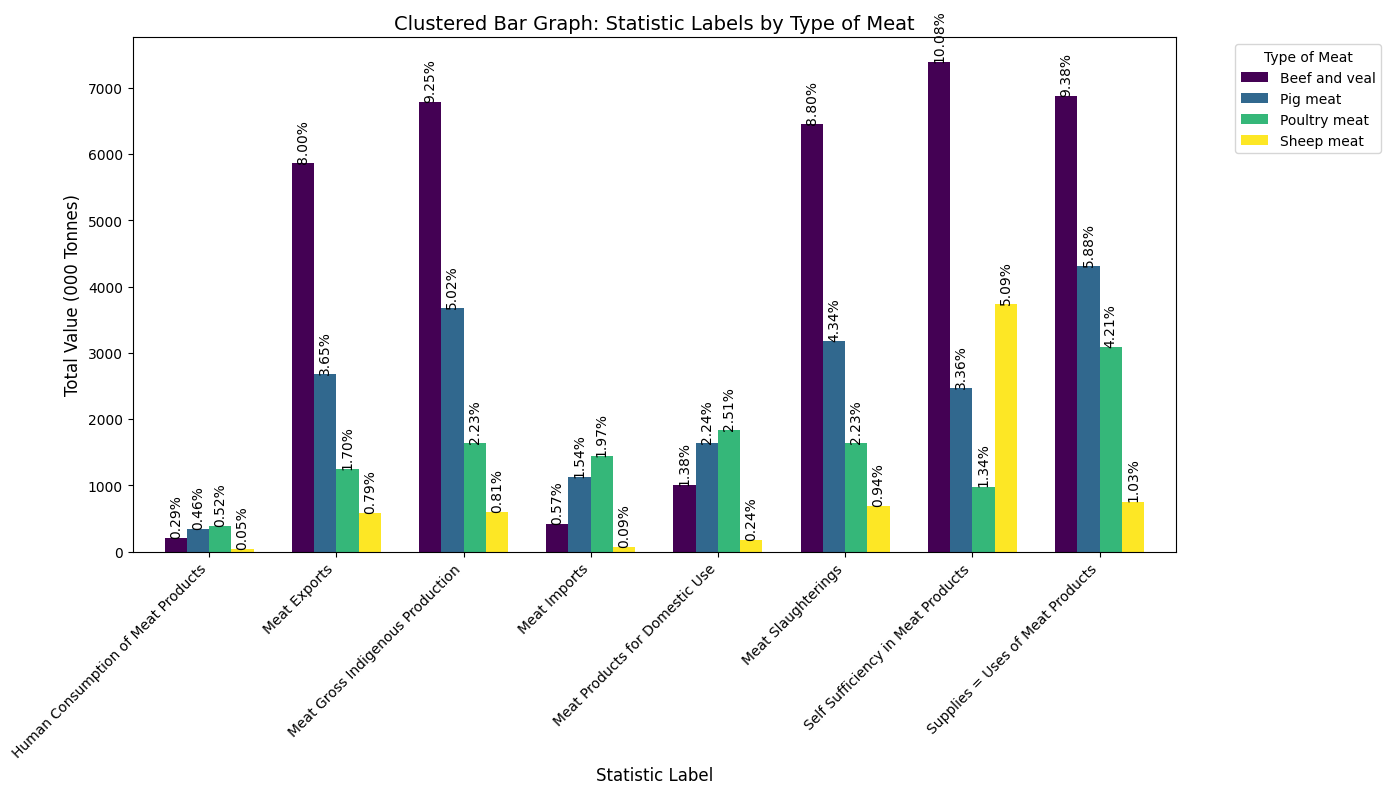

In [14]:
# Step 1: Filter out unwanted observations
df_filtered = df[(df['Statistic Label'] != 'Variation in Meat Stocks') &
                 (df['Type of Meat'] != 'Total Meat')]

# Step 2: Create a Pivot Table (Statistic Label by Type of Meat)
pivot_df = df_filtered.pivot_table(
    index='Statistic Label',
    columns='Type of Meat',
    values='VALUE',
    aggfunc='sum',
    fill_value=0
)

# Step 3: Frequency Table (Sum and Percentage)
frequency_table = df_filtered.groupby('Statistic Label')['VALUE'].sum().reset_index()
frequency_table.columns = ['Statistic Label', 'Total Value (000 Tonnes)']

# Calculate total and percentage frequency
total_value = frequency_table['Total Value (000 Tonnes)'].sum()
frequency_table['Percentage (%)'] = (frequency_table['Total Value (000 Tonnes)'] / total_value) * 100

# Append Total Row
total_row = pd.DataFrame({'Statistic Label': ['Total'],
                          'Total Value (000 Tonnes)': [total_value],
                          'Percentage (%)': [100.0]})
frequency_table = pd.concat([frequency_table, total_row], ignore_index=True)

# Display the Frequency Table
print("Frequency Table:\n", frequency_table)

# Step 4: Plot the Clustered Bar Graph
plt.figure(figsize=(14, 8))  # Increase figure size to prevent overlap
bars = pivot_df.plot(kind='bar', width=0.7, figsize=(14, 8), colormap='viridis')

# Step 5: Add percentage labels on each bar
for container in bars.containers:
    for bar in container:
        height = bar.get_height()
        # Calculate percentage for each bar
        percentage = (height / total_value) * 100 if total_value > 0 else 0
        plt.annotate(f'{percentage:.2f}%',  # Percentage value with two decimal places
                     (bar.get_x() + bar.get_width() / 2, height),  # Positioning
                     ha='center', va='bottom', fontsize=10, rotation=90)  # Rotated 270 degrees

# Step 6: Customize the Plot
plt.xlabel('Statistic Label', fontsize=12)
plt.ylabel('Total Value (000 Tonnes)', fontsize=12)
plt.title('Clustered Bar Graph: Statistic Labels by Type of Meat', fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='Type of Meat', bbox_to_anchor=(1.05, 1), loc='upper left')  # Legend on the side
plt.tight_layout()  # Ensure everything fits within the plot area

# Step 7: Display the Plot
plt.show()

Frequency Table:
                       Statistic Label  Total Value (000 Tonnes)  \
0  Human Consumption of Meat Products                967.143734   
1                        Meat Exports              10368.953913   
2    Meat Gross Indigenous Production              12695.557983   
3                        Meat Imports               3063.325900   
4      Meat Products for Domestic Use               4662.897032   
5                  Meat Slaughterings              11964.525045   
6   Self Sufficiency in Meat Products              14575.313366   
7    Supplies = Uses of Meat Products              15032.850945   
8                               Total              73330.567920   

   Percentage (%)  
0        1.318882  
1       14.140016  
2       17.312777  
3        4.177420  
4        6.358736  
5       16.315877  
6       19.876177  
7       20.500115  
8      100.000000  


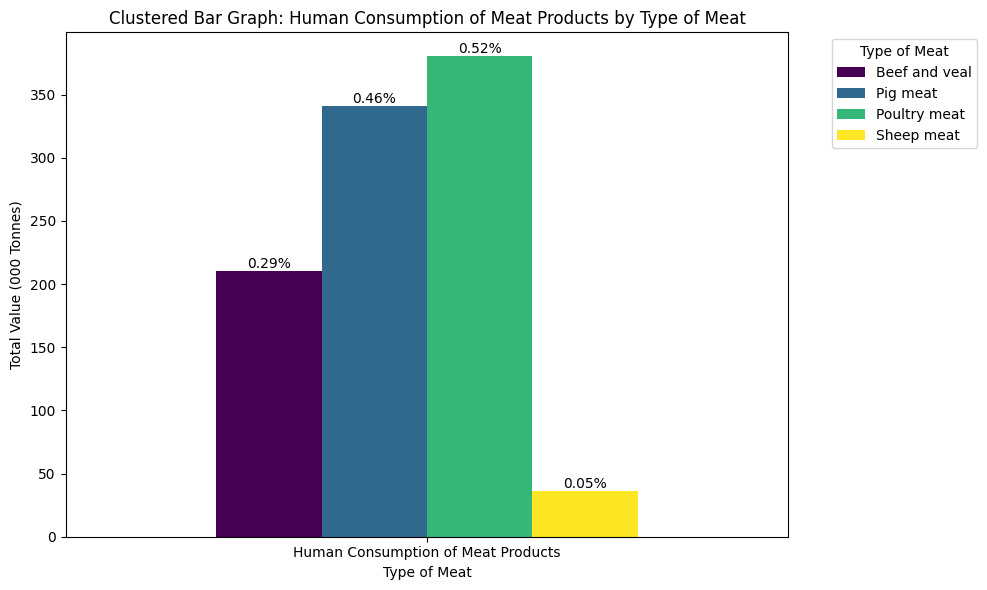

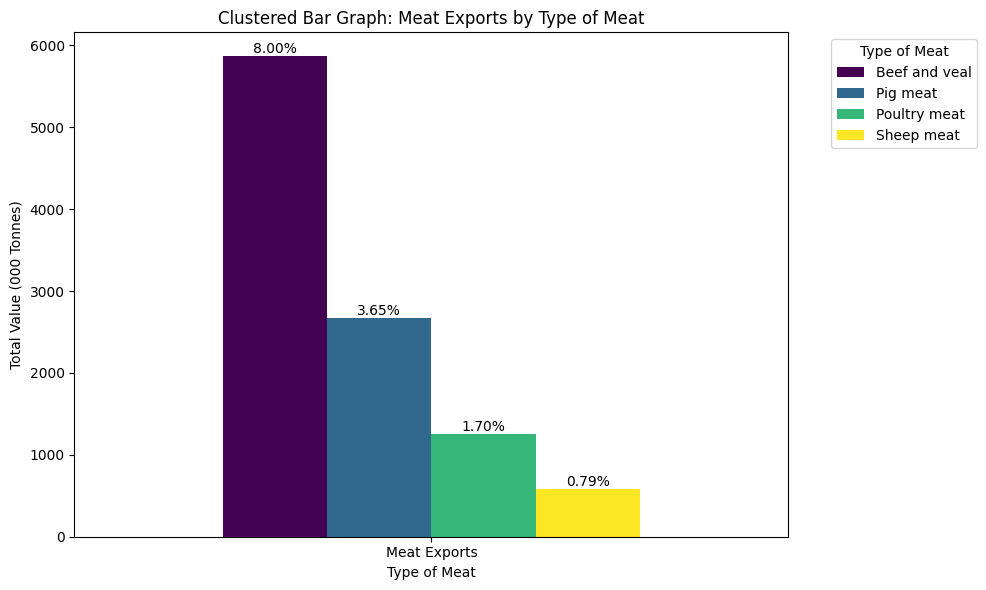

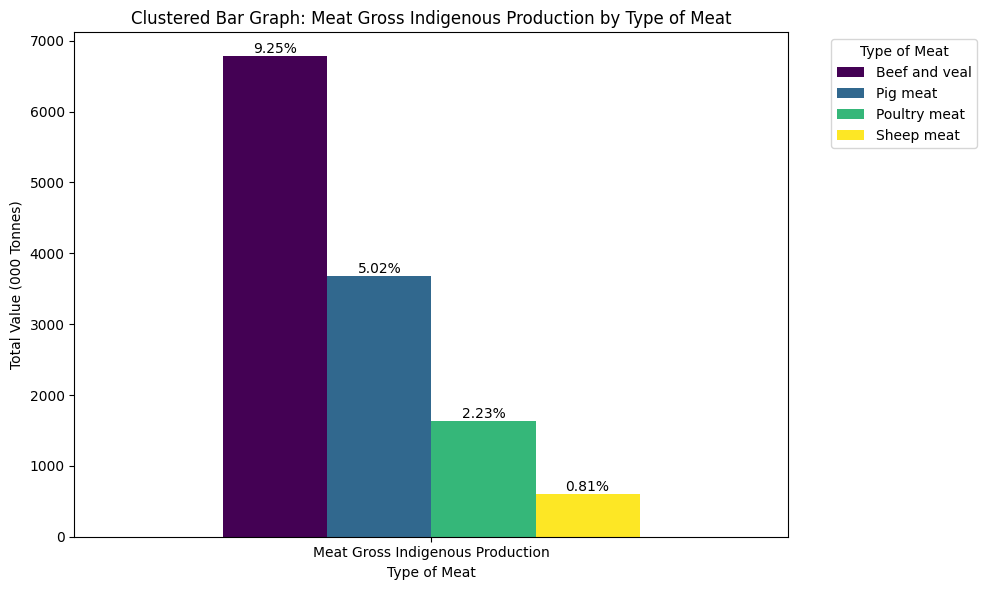

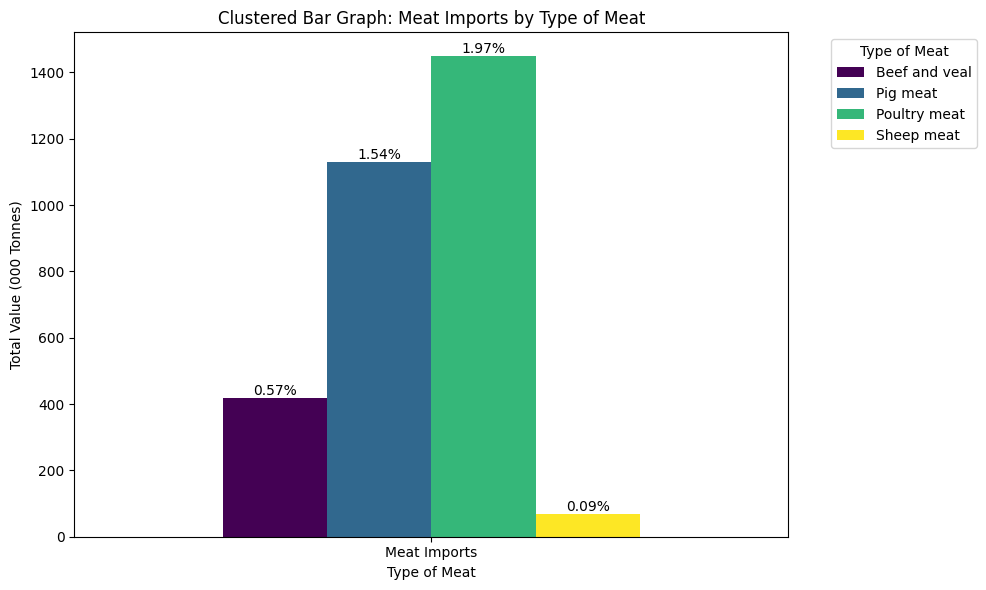

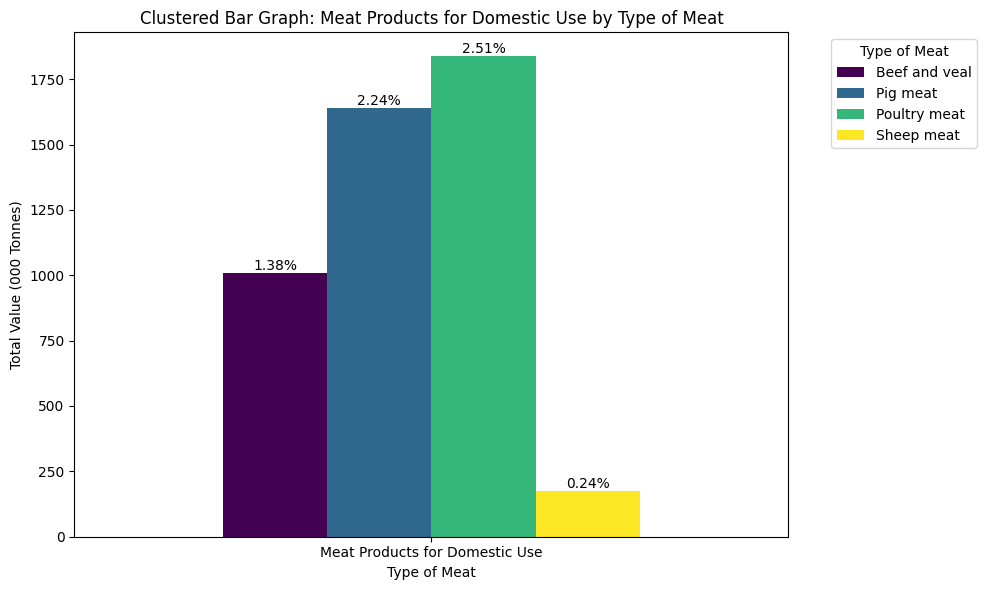

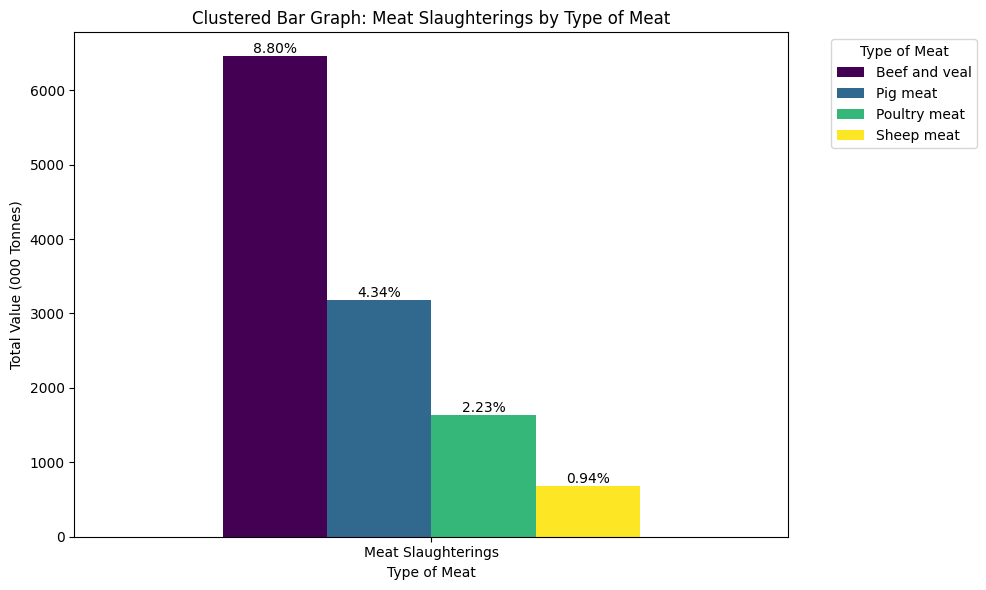

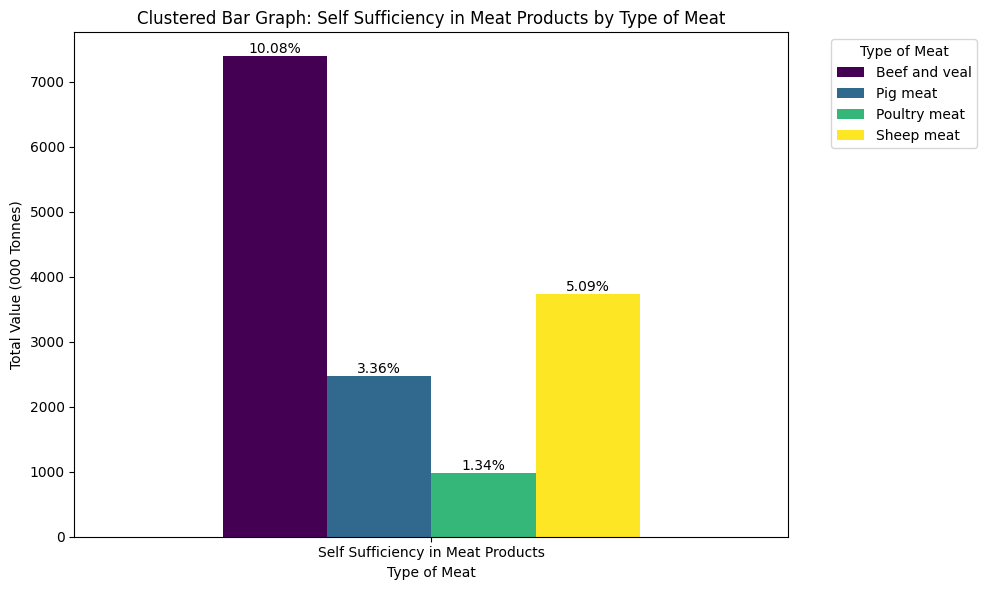

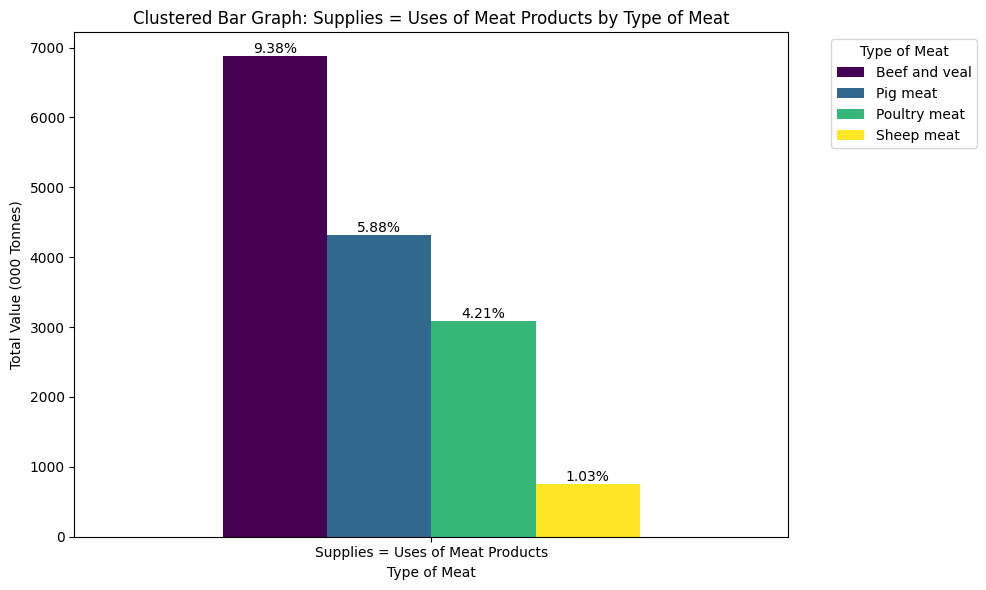

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Filter out unwanted observations
df_filtered = df[(df['Statistic Label'] != 'Variation in Meat Stocks') &
                 (df['Type of Meat'] != 'Total Meat')]

# Step 2: Create a Pivot Table (Statistic Label by Type of Meat)
pivot_df = df_filtered.pivot_table(
    index='Statistic Label',
    columns='Type of Meat',
    values='VALUE',
    aggfunc='sum',
    fill_value=0
)

# Step 3: Frequency Table (Sum and Percentage)
frequency_table = df_filtered.groupby('Statistic Label')['VALUE'].sum().reset_index()
frequency_table.columns = ['Statistic Label', 'Total Value (000 Tonnes)']

# Calculate total and percentage frequency
total_value = frequency_table['Total Value (000 Tonnes)'].sum()
frequency_table['Percentage (%)'] = (frequency_table['Total Value (000 Tonnes)'] / total_value) * 100

# Append Total Row
total_row = pd.DataFrame({'Statistic Label': ['Total'],
                          'Total Value (000 Tonnes)': [total_value],
                          'Percentage (%)': [100.0]})
frequency_table = pd.concat([frequency_table, total_row], ignore_index=True)

# Display the Frequency Table
print("Frequency Table:\n", frequency_table)

# Step 4: Plot Clustered Bar Graphs for Each Statistic Label
for stat_label in pivot_df.index:
    # Plot each 'Statistic Label' as a clustered bar graph
    plt.figure(figsize=(10, 6))
    pivot_df.loc[[stat_label]].plot(
        kind='bar',
        width=0.7,
        colormap='viridis',
        ax=plt.gca()
    )

    # Step 5: Add percentage labels on each bar
    for container in plt.gca().containers:
        for bar in container:
            height = bar.get_height()
            percentage = (height / total_value) * 100 if total_value > 0 else 0
            plt.annotate(f'{percentage:.2f}%',
                         (bar.get_x() + bar.get_width() / 2, height),
                         ha='center', va='bottom', fontsize=10)

    # Step 6: Customize the Plot
    plt.xlabel('Type of Meat')
    plt.ylabel('Total Value (000 Tonnes)')
    plt.title(f'Clustered Bar Graph: {stat_label} by Type of Meat')
    plt.xticks(rotation=0)
    plt.legend(title='Type of Meat', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()

    # Display the individual plot for each Statistic Label
    plt.show()


In [19]:
# Define supply and demand lists based on categorization
supply_labels = [
    'Human Consumption of Meat Products', 'Meat Imports',  'Meat Products for Domestic Use'
    'Meat Gross Indigenous Production', 'Meat Slaughterings', 'Self Sufficiency in Meat Products', 'Supplies = Uses of Meat Products'
]

demand_labels = [
    'Human Consumption of Meat Products', 'Meat Imports', 'Meat Products for Domestic Use'
]

# Add a new column for classification
df['Category'] = df['Statistic Label'].apply(lambda x: 'Supply' if x in supply_labels else 'Demand')

# Display the result
print(df)

    STATISTIC                    Statistic Label  TLIST(A1)  Year  \
0    ABA06C01                 Meat Slaughterings       2012  2012   
1    ABA06C01                 Meat Slaughterings       2012  2012   
2    ABA06C01                 Meat Slaughterings       2012  2012   
3    ABA06C01                 Meat Slaughterings       2012  2012   
4    ABA06C01                 Meat Slaughterings       2012  2012   
..        ...                                ...        ...   ...   
490  ABA06C09  Self Sufficiency in Meat Products       2022  2022   
491  ABA06C09  Self Sufficiency in Meat Products       2022  2022   
492  ABA06C09  Self Sufficiency in Meat Products       2022  2022   
493  ABA06C09  Self Sufficiency in Meat Products       2022  2022   
494  ABA06C09  Self Sufficiency in Meat Products       2022  2022   

    C02062V02489   Type of Meat        UNIT       VALUE Category  
0              -     Total Meat  000 Tonnes  923.000000   Supply  
1             01  Beef and veal  000 

Frequency Table for Total Meat:
   Category  Total Value (000 Tonnes)  Percentage (%)
0   Demand              19063.320581       30.870291
1   Supply              42689.646829       69.129709


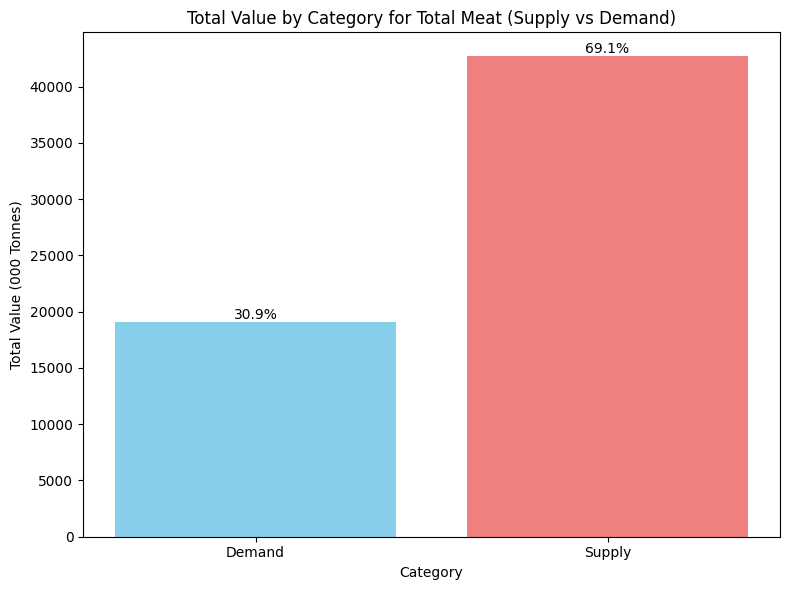

Frequency Table for Beef and veal:
   Category  Total Value (000 Tonnes)  Percentage (%)
0   Demand               7502.326792       21.432805
1   Supply              27501.615706       78.567195


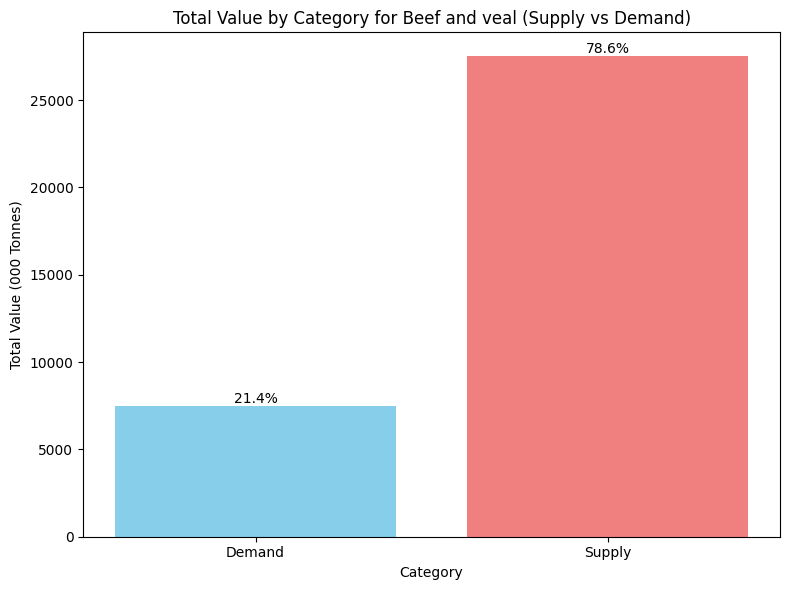

Frequency Table for Pig meat:
   Category  Total Value (000 Tonnes)  Percentage (%)
0   Demand               5785.923276       29.777865
1   Supply              13644.358936       70.222135


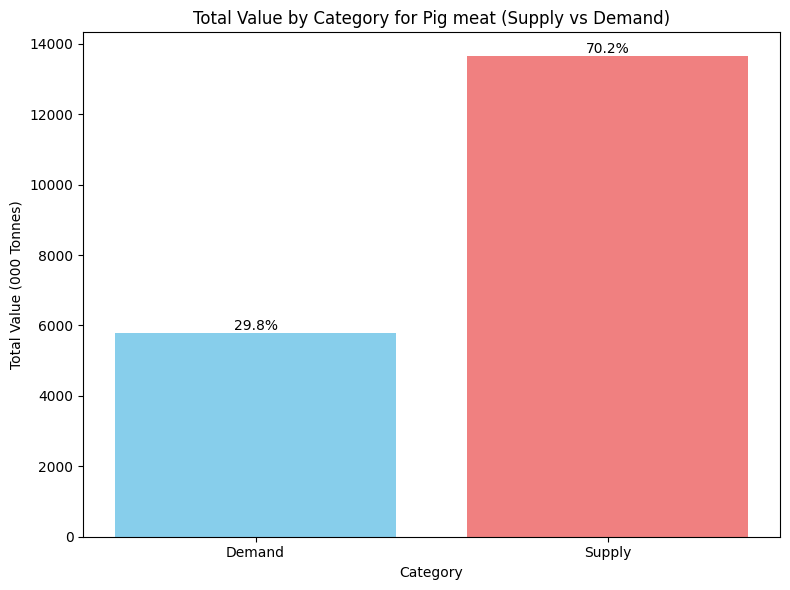

Frequency Table for Sheep meat:
   Category  Total Value (000 Tonnes)  Percentage (%)
0   Demand                859.674617       12.955816
1   Supply               5775.759285       87.044184


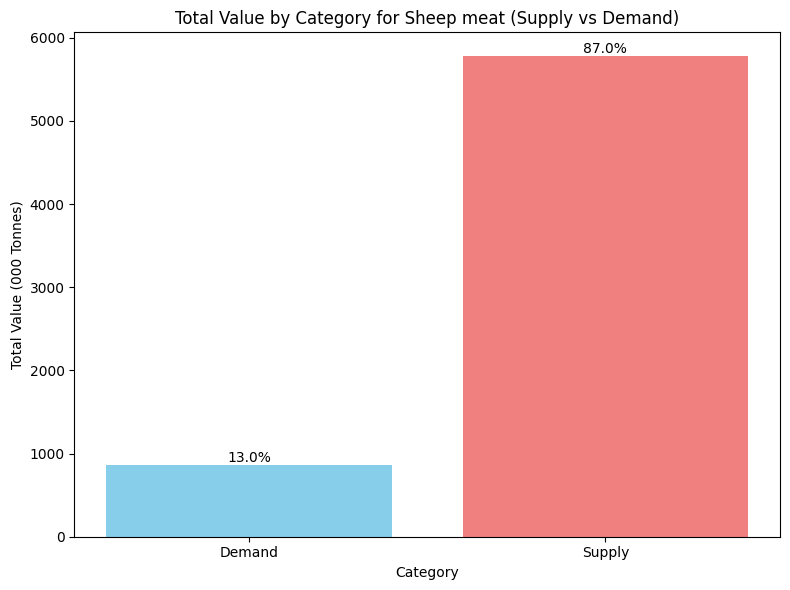

Frequency Table for Poultry meat:
   Category  Total Value (000 Tonnes)  Percentage (%)
0   Demand               4914.395894       40.081822
1   Supply               7346.513413       59.918178


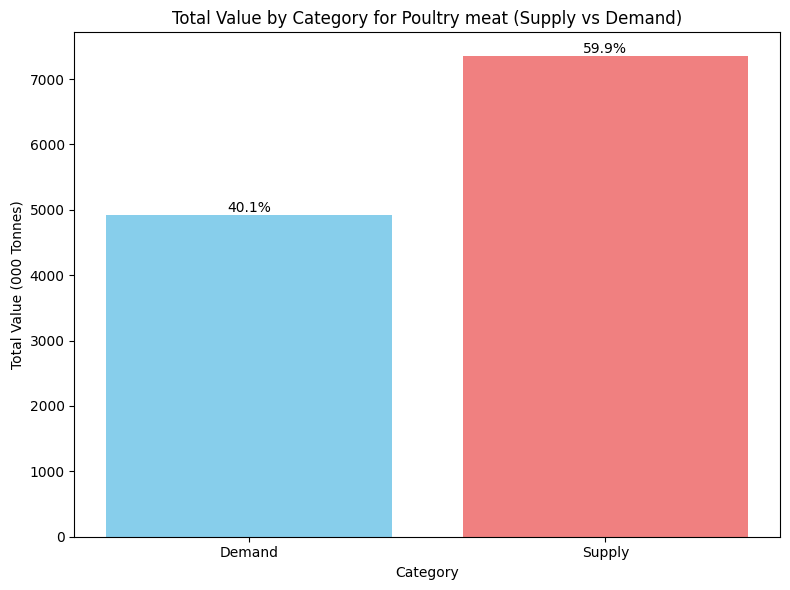

In [20]:
# Step 1: Create frequency tables and plots for each Type of Meat
for meat_type in df['Type of Meat'].unique():
    # Filter data for each Type of Meat
    meat_data = df[df['Type of Meat'] == meat_type]

    # Frequency table for each Type of Meat by Category
    frequency_table = meat_data.groupby('Category')['VALUE'].sum().reset_index()
    frequency_table.columns = ['Category', 'Total Value (000 Tonnes)']

    # Calculate percentage for each category within the specific Type of Meat
    total_value = frequency_table['Total Value (000 Tonnes)'].sum()
    frequency_table['Percentage (%)'] = (frequency_table['Total Value (000 Tonnes)'] / total_value) * 100

    # Display the frequency table for each Type of Meat
    print(f"Frequency Table for {meat_type}:\n", frequency_table)

    # Plot the bar plot for each Type of Meat
    plt.figure(figsize=(8, 6))
    plt.bar(frequency_table['Category'], frequency_table['Total Value (000 Tonnes)'], color=['skyblue', 'lightcoral'])
    plt.xlabel('Category')
    plt.ylabel('Total Value (000 Tonnes)')
    plt.title(f'Total Value by Category for {meat_type} (Supply vs Demand)')

    # Add percentage labels on top of each bar
    for index, value in enumerate(frequency_table['Total Value (000 Tonnes)']):
        plt.text(index, value, f'{frequency_table["Percentage (%)"][index]:.1f}%', ha='center', va='bottom', fontsize=10)

    # Show the plot for each Type of Meat
    plt.tight_layout()
    plt.show()

Frequency Table for Demand:
     Type of Meat  Total Value (000 Tonnes)  Percentage (%)
0  Beef and veal               7085.020792       44.284162
1       Pig meat               4656.210676       29.103145
2   Poultry meat               3466.206094       21.665149
3     Sheep meat                791.557117        4.947543


Frequency Table for Supply:
     Type of Meat  Total Value (000 Tonnes)  Percentage (%)
0  Beef and veal              27918.921706       48.697289
1       Pig meat              14774.071536       25.769521
2   Poultry meat               8794.703213       15.340070
3     Sheep meat               5843.876785       10.193121




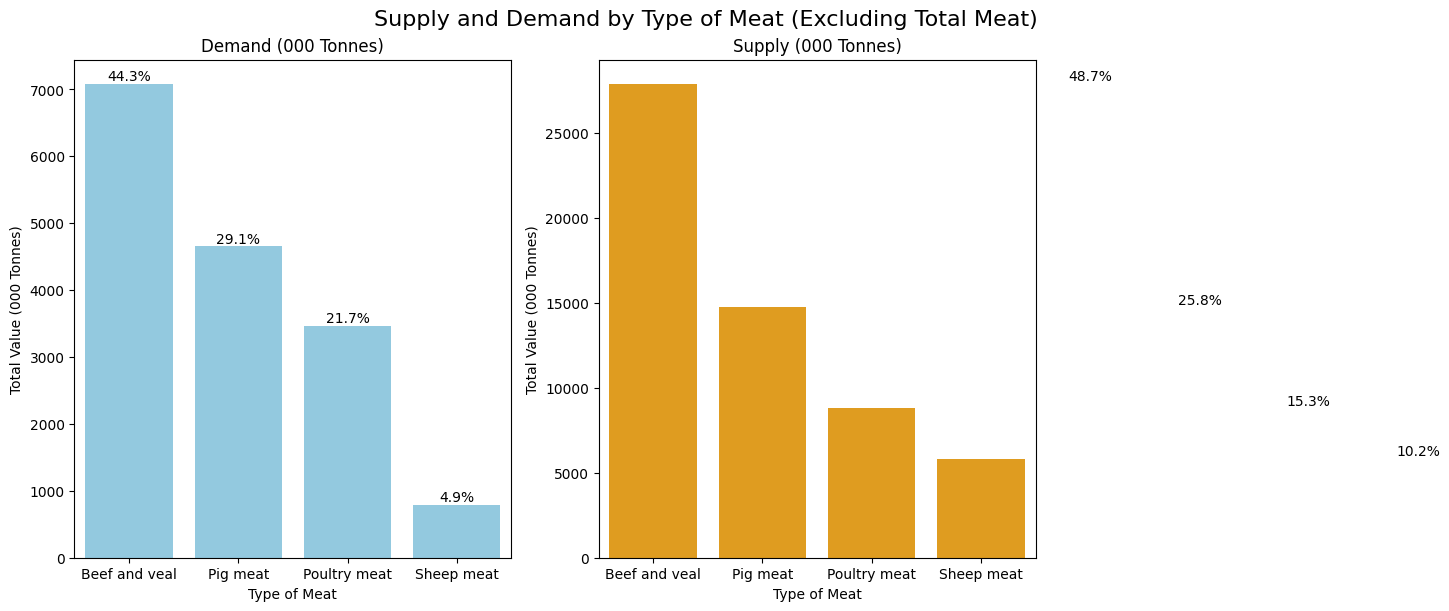

In [33]:
# Remove rows where Type of Meat is 'Total Meat'
df_filtered = df[df['Type of Meat'] != 'Total Meat']

# Step 1: Create frequency tables with percentages for each category
frequency_tables = {}
for category in ['Demand', 'Supply']:
    category_data = df_filtered[df_filtered['Category'] == category]
    frequency_table = category_data.groupby('Type of Meat')['VALUE'].sum().reset_index()
    frequency_table.columns = ['Type of Meat', 'Total Value (000 Tonnes)']

    # Calculate percentage for each Type of Meat within the category
    total_value = frequency_table['Total Value (000 Tonnes)'].sum()
    frequency_table['Percentage (%)'] = (frequency_table['Total Value (000 Tonnes)'] / total_value) * 100

    # Store the frequency table
    frequency_tables[category] = frequency_table

    # Display the frequency table
    print(f"Frequency Table for {category}:\n", frequency_table)
    print("\n")

# Step 2: Aggregate by Category and Type of Meat and calculate percentage
group_agg = df_filtered.groupby(['Category', 'Type of Meat'])['VALUE'].sum().reset_index()

# Calculate percentage for each Category and Type of Meat
group_agg['Percentage (%)'] = group_agg.groupby('Category')['VALUE'].transform(lambda x: (x / x.sum()) * 100)

# Step 3: Plotting
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14, 6), constrained_layout=True, sharex=True)

# Demand Plot
demand_data = group_agg[group_agg['Category'] == 'Demand']
sns.barplot(data=demand_data, x='Type of Meat', y='VALUE', color="skyblue", ax=ax1)
ax1.set_title('Demand (000 Tonnes)')
ax1.set_ylabel('Total Value (000 Tonnes)')
ax1.set_xlabel('Type of Meat')

# Add percentage labels on demand bars
for index, row in demand_data.iterrows():
    ax1.text(index, row['VALUE'], f"{row['Percentage (%)']:.1f}%", ha='center', va='bottom', fontsize=10)

# Supply Plot
supply_data = group_agg[group_agg['Category'] == 'Supply']
sns.barplot(data=supply_data, x='Type of Meat', y='VALUE', color='orange', ax=ax2)
ax2.set_title('Supply (000 Tonnes)')
ax2.set_ylabel('Total Value (000 Tonnes)')
ax2.set_xlabel('Type of Meat')

# Add percentage labels on supply bars
for index, row in supply_data.iterrows():
    ax2.text(index, row['VALUE'], f"{row['Percentage (%)']:.1f}%", ha='center', va='bottom', fontsize=10)

# Set overall title
fig.suptitle("Supply and Demand by Type of Meat (Excluding Total Meat)", fontsize=16)

# Show the plot
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Supply Forecast for Beef and veal:
 2023-01-01    526.274864
2024-01-01    535.997769
2025-01-01    526.275080
2026-01-01    535.997553
2027-01-01    526.275295
Freq: YS-JAN, Name: predicted_mean, dtype: float64


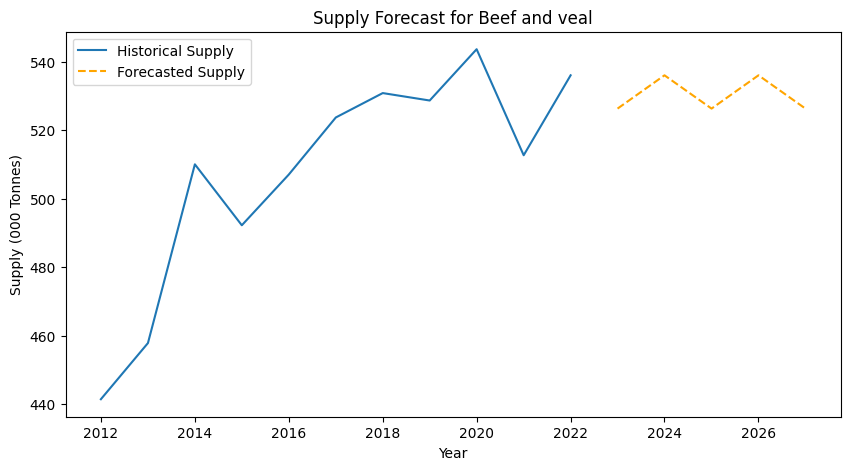

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Demand Forecast for Beef and veal:
 2023-01-01    167.630231
2024-01-01    170.846852
2025-01-01    167.630274
2026-01-01    170.846809
2027-01-01    167.630317
Freq: YS-JAN, Name: predicted_mean, dtype: float64


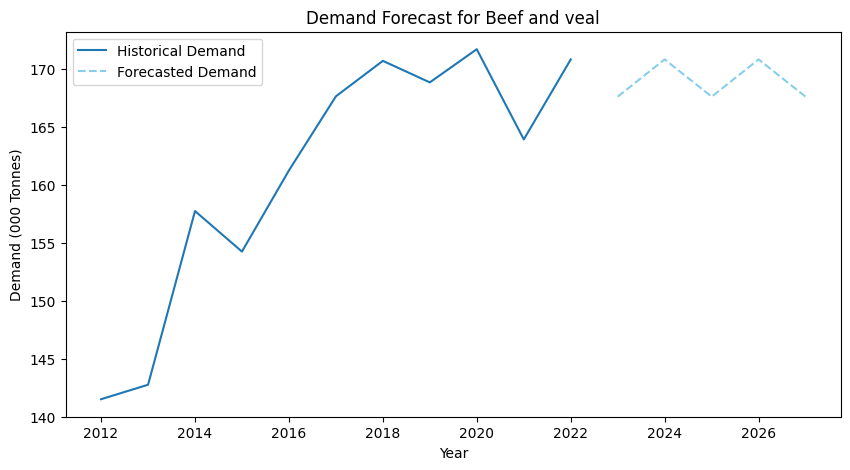

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA paramete

Supply Forecast for Pig meat:
 2023-01-01    294.940971
2024-01-01    299.076473
2025-01-01    303.211794
2026-01-01    307.346935
2027-01-01    311.481896
Freq: YS-JAN, Name: predicted_mean, dtype: float64


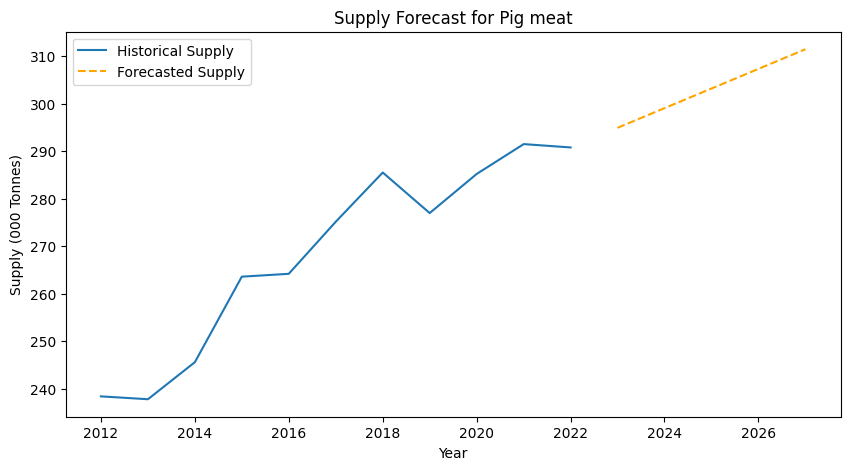

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)


Demand Forecast for Pig meat:
 2023-01-01    113.933027
2024-01-01    114.400435
2025-01-01    114.827177
2026-01-01    115.216792
2027-01-01    115.572510
Freq: YS-JAN, Name: predicted_mean, dtype: float64


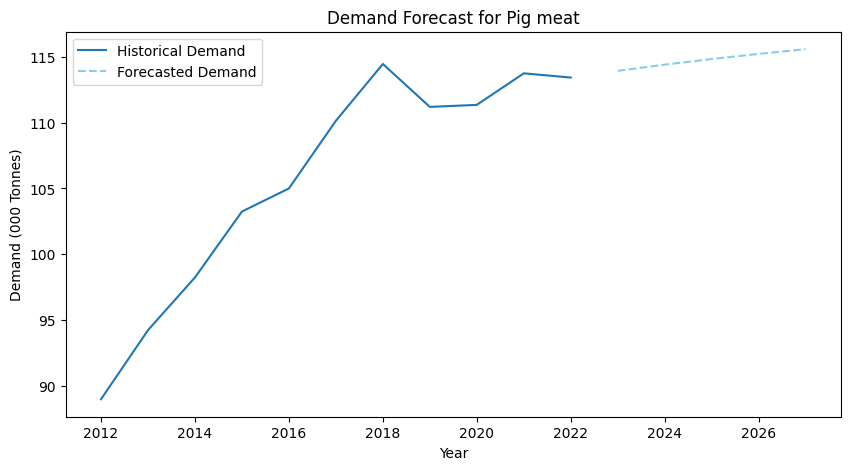

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)


Supply Forecast for Poultry meat:
 2023-01-01    181.980327
2024-01-01    183.058803
2025-01-01    183.324874
2026-01-01    183.390517
2027-01-01    183.406712
Freq: YS-JAN, Name: predicted_mean, dtype: float64


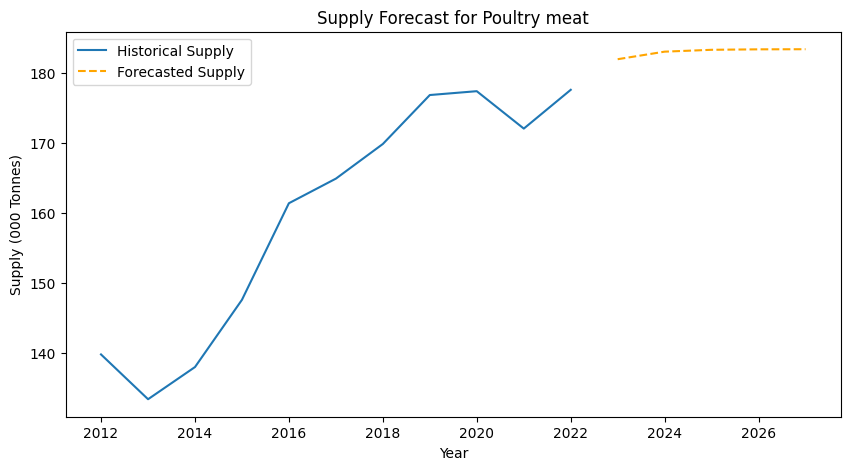

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Demand Forecast for Poultry meat:
 2023-01-01     92.124908
2024-01-01     94.116885
2025-01-01     96.108796
2026-01-01     98.100643
2027-01-01    100.092424
Freq: YS-JAN, Name: predicted_mean, dtype: float64


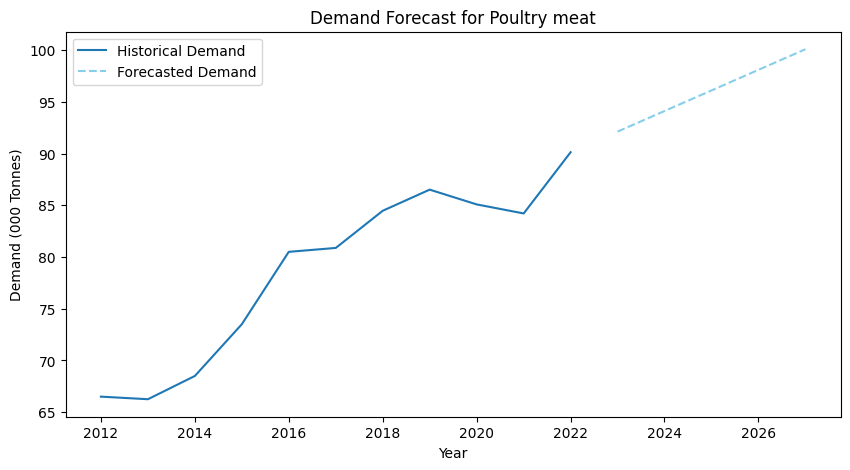

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)


Supply Forecast for Sheep meat:
 2023-01-01    119.745230
2024-01-01    121.077791
2025-01-01    120.384866
2026-01-01    120.745183
2027-01-01    120.557820
Freq: YS-JAN, Name: predicted_mean, dtype: float64


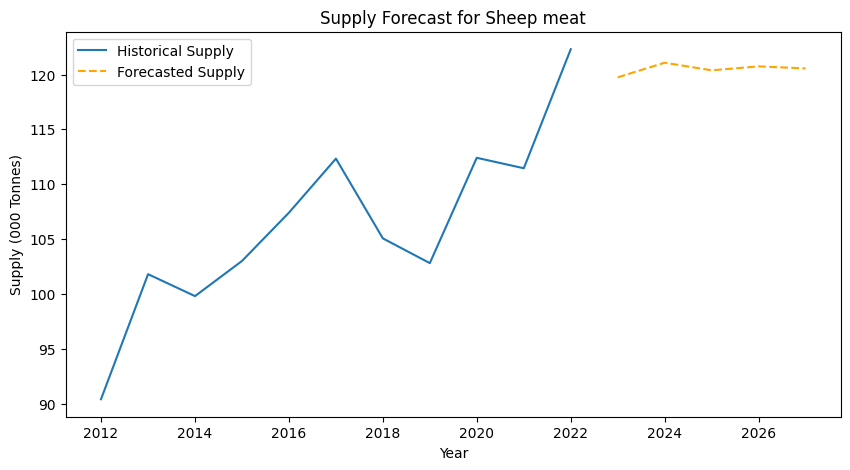

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA paramete

Demand Forecast for Sheep meat:
 2023-01-01    20.466766
2024-01-01    20.763760
2025-01-01    21.060740
2026-01-01    21.357705
2027-01-01    21.654655
Freq: YS-JAN, Name: predicted_mean, dtype: float64


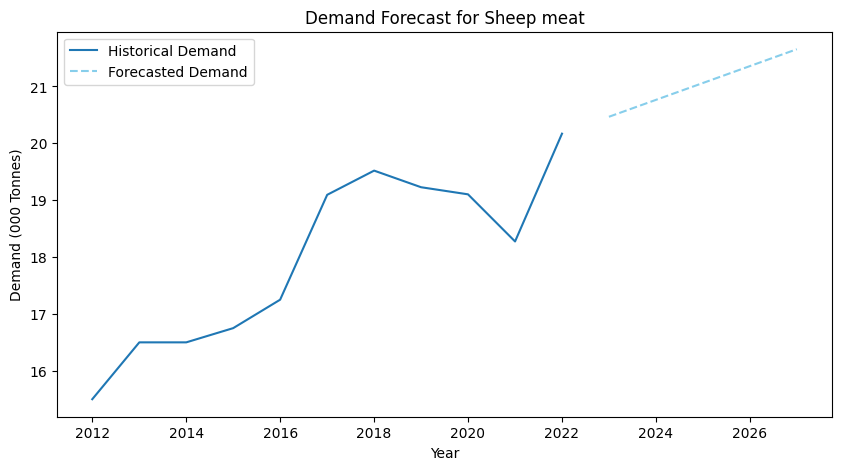

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)


Supply Forecast for Total Meat:
 2023-01-01    907.335676
2024-01-01    916.763622
2025-01-01    925.774377
2026-01-01    934.386402
2027-01-01    942.617341
Freq: YS-JAN, Name: predicted_mean, dtype: float64


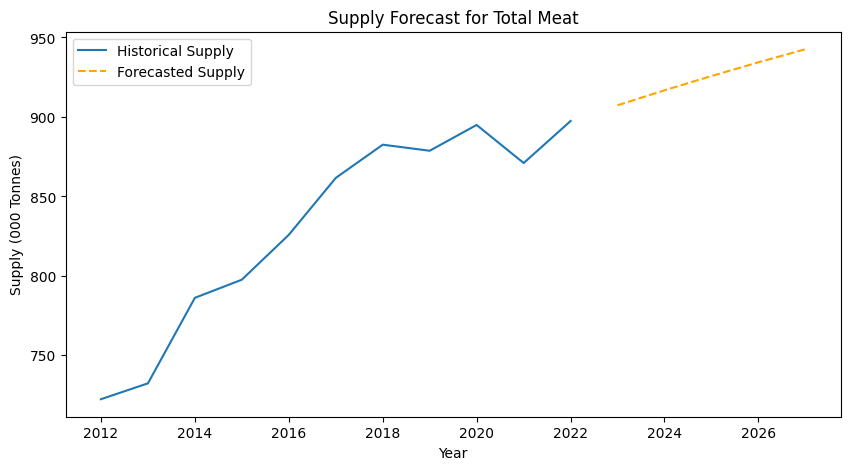

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)


Demand Forecast for Total Meat:
 2023-01-01    398.944077
2024-01-01    402.999629
2025-01-01    406.760364
2026-01-01    410.247714
2027-01-01    413.481551
Freq: YS-JAN, Name: predicted_mean, dtype: float64


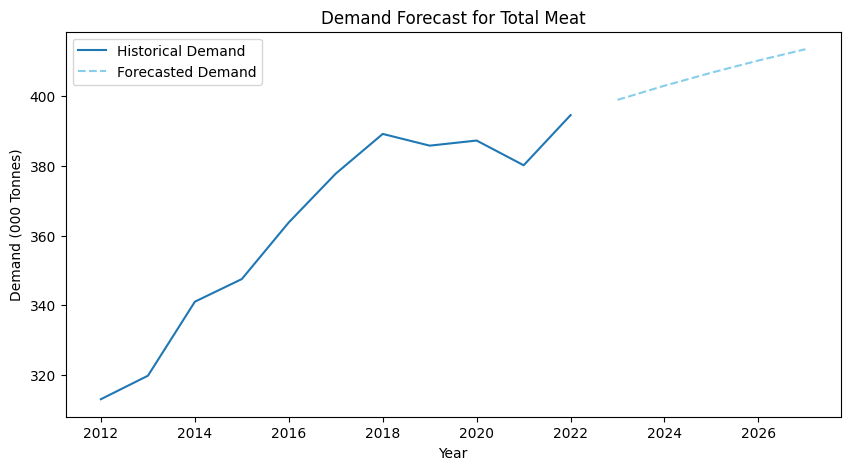

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Convert 'Year' to datetime format
df['Year'] = pd.to_datetime(df['Year'], format='%Y')

# Aggregate to remove duplicates by taking the mean of each Year, Type of Meat, and Category
df_unique = df.groupby(['Year', 'Type of Meat', 'Category'])['VALUE'].mean().reset_index()

# Filter data by unique meat types for analysis
meat_types = df_unique['Type of Meat'].unique()

# Run ARIMA models for each meat type, forecasting Supply and Demand
for meat_type in meat_types:
    # Filter data for each meat type and pivot it by category (Supply, Demand)
    meat_data = df_unique[df_unique['Type of Meat'] == meat_type]
    pivot_data = meat_data.pivot(index='Year', columns='Category', values='VALUE')

    # Extract time series for Supply and Demand separately
    supply_ts = pivot_data['Supply'].dropna()  # Drop missing values
    demand_ts = pivot_data['Demand'].dropna()

    # Check that the time series are long enough for ARIMA modeling
    if len(supply_ts) > 2 and len(demand_ts) > 2:
        # Fit ARIMA model for Supply
        supply_model = sm.tsa.ARIMA(supply_ts, order=(1, 1, 1))  # Adjust order if needed
        supply_fit = supply_model.fit()

        # Forecast next 5 years of Supply
        supply_forecast = supply_fit.forecast(steps=5)
        print(f"Supply Forecast for {meat_type}:\n", supply_forecast)

        # Plot historical and forecasted Supply
        plt.figure(figsize=(10, 5))
        plt.plot(supply_ts, label='Historical Supply')
        plt.plot(supply_forecast, label='Forecasted Supply', linestyle='--', color='orange')
        plt.title(f'Supply Forecast for {meat_type}')
        plt.xlabel('Year')
        plt.ylabel('Supply (000 Tonnes)')
        plt.legend()
        plt.show()

        # Fit ARIMA model for Demand
        demand_model = sm.tsa.ARIMA(demand_ts, order=(1, 1, 1))  # Adjust order if needed
        demand_fit = demand_model.fit()

        # Forecast next 5 years of Demand
        demand_forecast = demand_fit.forecast(steps=5)
        print(f"Demand Forecast for {meat_type}:\n", demand_forecast)

        # Plot historical and forecasted Demand
        plt.figure(figsize=(10, 5))
        plt.plot(demand_ts, label='Historical Demand')
        plt.plot(demand_forecast, label='Forecasted Demand', linestyle='--', color='skyblue')
        plt.title(f'Demand Forecast for {meat_type}')
        plt.xlabel('Year')
        plt.ylabel('Demand (000 Tonnes)')
        plt.legend()
        plt.show()
    else:
        print(f"Insufficient data for ARIMA modeling for {meat_type}")


#**Preprocessing**

In [ ]:
df['Statistic Label']= df['Statistic Label'].replace('Human Consumption of Meat Products', 'Demand')

In [ ]:
df.rename(columns={'Statistic Label': 'Label'}, inplace=True)

In [ ]:
print(df)

                              Label  Year   Type of Meat           UNIT  \
0                      Meat Imports  2012  Beef and veal     000 Tonnes   
1                      Meat Imports  2012       Pig meat     000 Tonnes   
2                      Meat Imports  2012     Sheep meat     000 Tonnes   
3                      Meat Imports  2012   Poultry meat     000 Tonnes   
4                      Meat Imports  2013  Beef and veal     000 Tonnes   
5                      Meat Imports  2013       Pig meat     000 Tonnes   
6                      Meat Imports  2013     Sheep meat     000 Tonnes   
7                      Meat Imports  2013   Poultry meat     000 Tonnes   
8                      Meat Imports  2014  Beef and veal     000 Tonnes   
9                      Meat Imports  2014       Pig meat     000 Tonnes   
10                     Meat Imports  2014     Sheep meat     000 Tonnes   
11                     Meat Imports  2014   Poultry meat     000 Tonnes   
12                     Me

In [ ]:
# Drop the rows with total value as Meat Products for Domestic Use
df['Label'] = df['Label'].str.strip()

In [ ]:
df=df[df['Label'] !='Meat Products for Domestic Use']

In [ ]:
df.reset_index(drop=True, inplace=True)

In [ ]:
print(df)

            Label  Year   Type of Meat           UNIT       VALUE
0    Meat Imports  2012  Beef and veal     000 Tonnes   52.000000
1    Meat Imports  2012       Pig meat     000 Tonnes   87.000000
2    Meat Imports  2012     Sheep meat     000 Tonnes    4.000000
3    Meat Imports  2012   Poultry meat     000 Tonnes  104.000000
4    Meat Imports  2013  Beef and veal     000 Tonnes   34.000000
5    Meat Imports  2013       Pig meat     000 Tonnes  105.000000
6    Meat Imports  2013     Sheep meat     000 Tonnes    6.000000
7    Meat Imports  2013   Poultry meat     000 Tonnes  117.000000
8    Meat Imports  2014  Beef and veal     000 Tonnes   30.000000
9    Meat Imports  2014       Pig meat     000 Tonnes  105.000000
10   Meat Imports  2014     Sheep meat     000 Tonnes    5.000000
11   Meat Imports  2014   Poultry meat     000 Tonnes  129.000000
12   Meat Imports  2015  Beef and veal     000 Tonnes   33.000000
13   Meat Imports  2015       Pig meat     000 Tonnes  106.000000
14   Meat 

In [ ]:
# Drop the rows with total value as Meat Imports
df['Label'] = df['Label'].str.strip()

In [ ]:
df=df[df['Label'] !='Meat Imports']

In [ ]:
df.reset_index(drop=True, inplace=True)

In [ ]:
print(df)

     Label  Year   Type of Meat           UNIT       VALUE
0   Supply  2012  Beef and veal     000 Tonnes  547.000000
1   Supply  2012       Pig meat     000 Tonnes  329.000000
2   Supply  2012     Sheep meat     000 Tonnes   58.000000
3   Supply  2012   Poultry meat     000 Tonnes  236.000000
4   Supply  2013  Beef and veal     000 Tonnes  552.000000
5   Supply  2013       Pig meat     000 Tonnes  345.000000
6   Supply  2013     Sheep meat     000 Tonnes   63.000000
7   Supply  2013   Poultry meat     000 Tonnes  234.000000
8   Supply  2014  Beef and veal     000 Tonnes  612.000000
9   Supply  2014       Pig meat     000 Tonnes  360.000000
10  Supply  2014     Sheep meat     000 Tonnes   63.000000
11  Supply  2014   Poultry meat     000 Tonnes  245.000000
12  Supply  2015  Beef and veal     000 Tonnes  598.000000
13  Supply  2015       Pig meat     000 Tonnes  382.000000
14  Supply  2015     Sheep meat     000 Tonnes   64.000000
15  Supply  2015   Poultry meat     000 Tonnes  262.0000

# **Summary Statistics**
Supply is in 000 Tonnes

Demand is in Kg per capita


In [ ]:
df.groupby('Label')['VALUE'].describe()

,count,mean,std,min,25%,50%,75%,max
Label,,,,,,,,
Demand,44.0,21.980539,12.523664,2.941061,14.896514,23.358123,31.650436,41.938094
Supply,44.0,341.655703,205.312896,58.000000,194.934492,323.796684,456.953725,668.021300


# **Visualization**

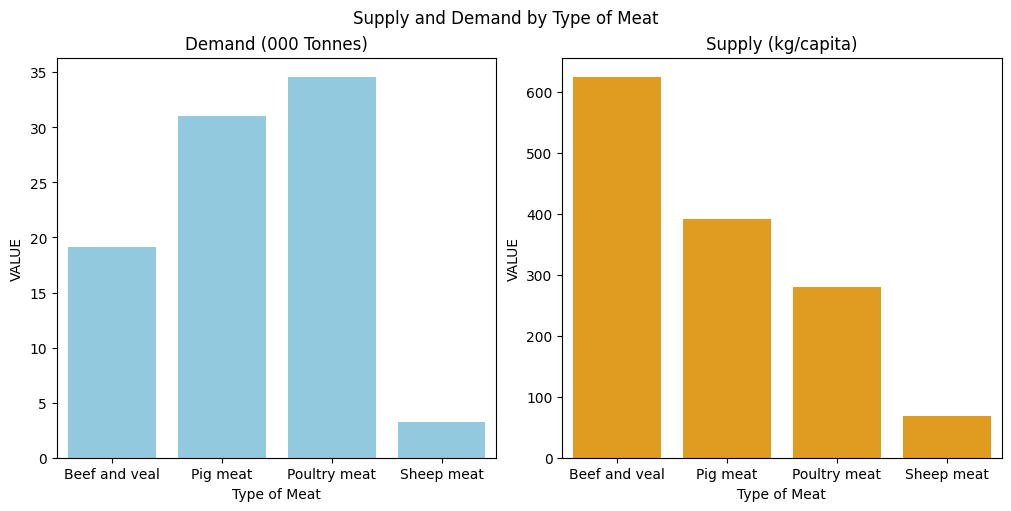

In [ ]:
# Aggregate by group label and Type of Meat
group_agg = df.groupby(['Label','Type of Meat'])['VALUE'].mean().reset_index()

fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (10, 5), constrained_layout = True, sharex = True)
sns.barplot(group_agg[group_agg.Label == 'Demand'], x = 'Type of Meat', y = 'VALUE', color = "skyblue", ax = ax1)
sns.barplot(group_agg[group_agg.Label == 'Supply'], x = 'Type of Meat', y = 'VALUE', color = 'orange', ax = ax2)
ax1.set_title('Demand (000 Tonnes)'), ax2.set_title("Supply (kg/capita)")
fig.suptitle("Supply and Demand by Type of Meat")
plt.show()

In [ ]:
plt.savefig('Supply and Demand by Meat Type.png')

<Figure size 640x480 with 0 Axes>

In [ ]:
df.groupby('Label')['VALUE'].describe()

,count,mean,std,min,25%,50%,75%,max
Label,,,,,,,,
Demand,44.0,21.980539,12.523664,2.941061,14.896514,23.358123,31.650436,41.938094
Supply,44.0,341.655703,205.312896,58.000000,194.934492,323.796684,456.953725,668.021300


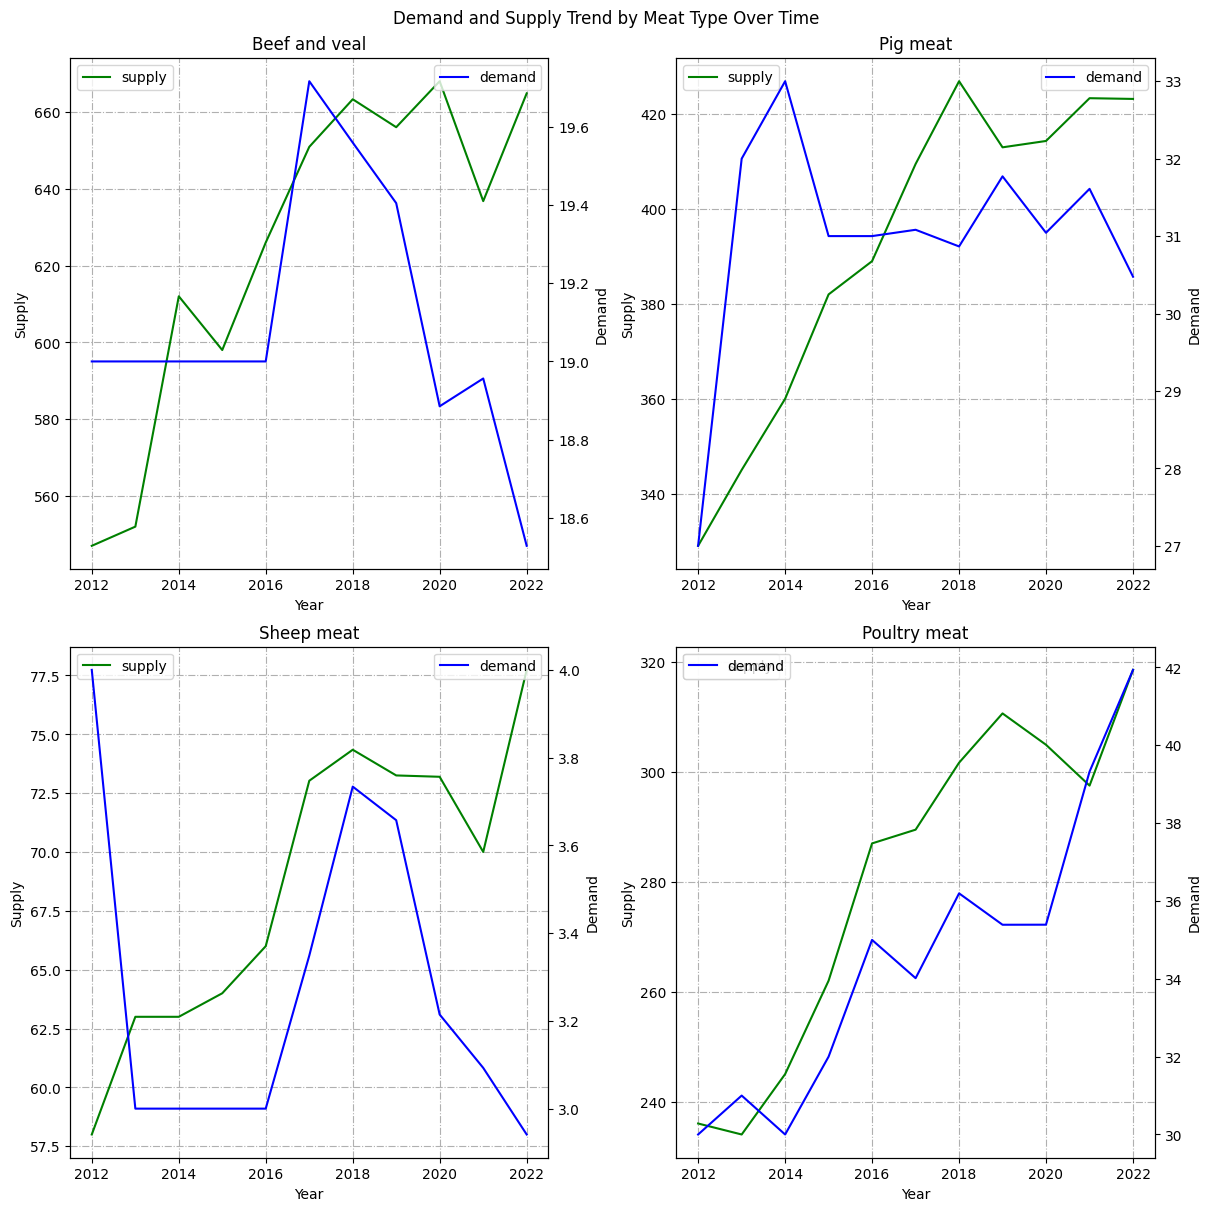

In [ ]:
# Convert 'Year' column to datetime index
df['Year'] = pd.to_datetime(df['Year'], format='%Y')

# Subplots of Supply Variables
fig, axs = plt.subplots(ncols = 2, nrows = 2, figsize = (12, 12), constrained_layout = True)
axs = axs.flatten()
df_supply = df.loc[df.Label == "supply"]
for ax, mt in zip(axs, df['Type of Meat'].unique()):
    ax1 = ax.twinx()
    data_mts = df.loc[(df['Type of Meat'] == mt) & (df.Label == 'Supply')] # Get the supply data and Type of Meat
    data_mtd = df.loc[(df['Type of Meat'] == mt) & (df.Label == 'Demand')] # Get the demand data and Type of Meat
    sns.lineplot(x = 'Year', y = 'VALUE', data = data_mts, ax = ax, color = "green", label = "supply")
    sns.lineplot(x = 'Year', y = 'VALUE', data = data_mtd, ax = ax1, color = "blue", label = "demand")
    ax.set_ylabel("Supply"), ax1.set_ylabel("Demand")
    ax.set_title(mt)
    ax.grid(linestyle = "dashdot")
    ax.legend(loc = "upper left"), ax1.legend()
fig.suptitle("Demand and Supply Trend by Meat Type Over Time")
plt.show()

# **Correlation between Supply and Demand**

In [ ]:
# Compute the correlation between supply and demand
np.corrcoef(df.VALUE[df.Label == 'Supply'], df.VALUE[df.Label == 'Demand'])[0,1]

0.4065879342260674

In [ ]:
print("CORRELATION BETWEEN SUPPLY AND DEMAND PER MEAT TYPE")
for mt in df['Type of Meat'].unique():
    dts = df.VALUE[(df['Type of Meat'] == mt) & (df.Label == 'Supply')]
    dtd = df.VALUE[(df['Type of Meat'] == mt) & (df.Label == 'Demand')]
    r = np.corrcoef(dts, dtd)[0, 1]
    print(f"{mt:<15s} : {r:>8.4f}")

CORRELATION BETWEEN SUPPLY AND DEMAND PER MEAT TYPE
Beef and veal   :   0.1938
Pig meat        :   0.3086
Sheep meat      :  -0.0646
Poultry meat    :   0.8718


# **Forecasting**

In [ ]:
# Aggregate
df['Type of Meat'] = df['Type of Meat'].apply(lambda x: x.lower().replace(" ", "_"))
df['t'] = df['Year'].dt.year - 2011 # Add time variable

# Create dummy variables from the data - drop first to avoid autocorrelation
dummy_var_Type_of_Meat = pd.get_dummies(df['Type of Meat'], drop_first = True).apply(lambda x: x.map({True: 1, False: 0}))
# Concatenate the data
dfsd = pd.concat([df, dummy_var_Type_of_Meat], axis = 1)

df_supply = dfsd.loc[df.Label == "Supply", ['t', 'pig_meat', 'poultry_meat', 'sheep_meat', 'VALUE']].reset_index(drop = True) # Supply Data
df_demand = dfsd.loc[df.Label == "Demand", ['t', 'pig_meat', 'poultry_meat', 'sheep_meat', 'VALUE']].reset_index(drop = True) # Demand Data

In [ ]:
df_supply

,t,pig_meat,poultry_meat,sheep_meat,VALUE,predicted_val
0,1,0,0,0,547.000000,585.900147
1,1,1,0,0,329.000000,353.208467
2,1,0,0,1,58.000000,29.590914
3,1,0,1,0,236.000000,241.534766
4,2,0,0,0,552.000000,593.719573
5,2,1,0,0,345.000000,361.027893
6,2,0,0,1,63.000000,37.410340
7,2,0,1,0,234.000000,249.354192
8,3,0,0,0,612.000000,601.538999
9,3,1,0,0,360.000000,368.847319


In [ ]:
df_demand

,t,pig_meat,poultry_meat,sheep_meat,VALUE,predicted_val
0,1,0,0,0,19.000000,17.677815
1,1,1,0,0,27.000000,29.568575
2,1,0,0,1,4.000000,1.853986
3,1,0,1,0,30.000000,33.150951
4,2,0,0,0,19.000000,17.961356
5,2,1,0,0,32.000000,29.852117
6,2,0,0,1,3.000000,2.137528
7,2,0,1,0,31.000000,33.434492
8,3,0,0,0,19.000000,18.244898
9,3,1,0,0,33.000000,30.135658


# **Linear Regression**
**Supply**

In [ ]:
X, y = df_supply.loc[:, ['t', 'pig_meat', 'poultry_meat', 'sheep_meat']], df_supply.VALUE

linreg_model = LinearRegression().fit(X,y)

# Model Coefficients
print("Model Coefficients - Supply:", linreg_model.coef_)
print("Model Intercept - Supply:",linreg_model.intercept_)

# MSE
print("MSE - Supply:", round(mean_squared_error(y, linreg_model.predict(X)), 3))
print("MAE - Supply:", round(mean_absolute_error(y, linreg_model.predict(X)), 3))

Model Coefficients - Supply: [   7.81942592 -232.69168003 -344.36538141 -556.30923305]
Model Intercept - Supply: 578.0807214348184
MSE - Supply: 313.143
MAE - Supply: 14.28


In [ ]:
# Predicting poultry supply in the year 2032
linreg_model.predict(
    np.array([[12, 0, 1, 0],
              [13, 0, 1, 0],
              [14, 0, 1, 0],
              [15, 0, 1, 0],
              [16, 0, 1, 0],
              [17, 0, 1, 0]])
)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([327.54845101, 335.36787693, 343.18730284, 351.00672876,
       358.82615467, 366.64558059])

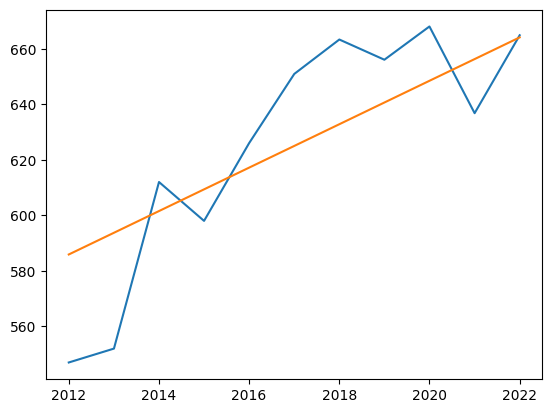

In [ ]:
df_supply['predicted_val'] = linreg_model.predict(X)
act_beef = df_supply.loc[range(0, df_supply.shape[0], 4), "VALUE"]
pred_beef = df_supply.loc[range(0, df_supply.shape[0], 4), "predicted_val"]

plt.plot(dfsd.Year.unique(), act_beef)
plt.plot(dfsd.Year.unique(), pred_beef)

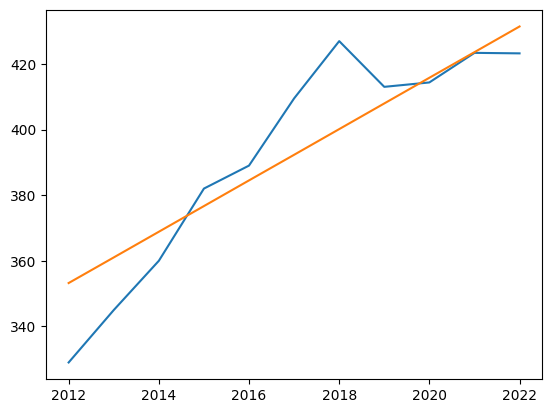

In [ ]:
df_supply['predicted_val'] = linreg_model.predict(X)
act_pig = df_supply.loc[df_supply.pig_meat == 1, "VALUE"]
pred_pig = df_supply.loc[df_supply.pig_meat == 1, "predicted_val"]

plt.plot(dfsd.Year.unique(), act_pig)
plt.plot(dfsd.Year.unique(), pred_pig)

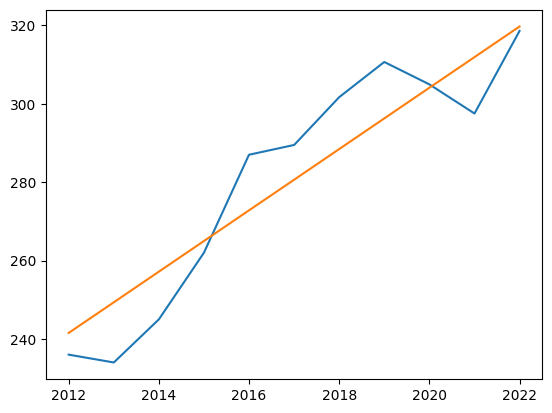

In [ ]:
df_supply['predicted_val'] = linreg_model.predict(X)
act_poultry = df_supply.loc[df_supply.poultry_meat == 1, "VALUE"]
pred_poultry = df_supply.loc[df_supply.poultry_meat == 1, "predicted_val"]

plt.plot(dfsd.Year.unique(), act_poultry)
plt.plot(dfsd.Year.unique(), pred_poultry)

**Demand**

In [ ]:
X, y = df_demand.loc[:, ['t', 'pig_meat', 'poultry_meat', 'sheep_meat']], df_demand.VALUE

linreg_modeld = LinearRegression().fit(X,y)

# Model Coefficients
print("Model Coefficients - Demand:", linreg_modeld.coef_)
print("Model Intercept - Supply:",linreg_modeld.intercept_)

# MSE
print("MSE - Demand:", round(mean_squared_error(y, linreg_modeld.predict(X)), 3))
print("MAE - Demand:", round(mean_absolute_error(y, linreg_modeld.predict(X)), 3))

Model Coefficients - Demand: [  0.28354155  11.89076036  15.47313612 -15.82382831]
Model Intercept - Supply: 17.394273099877278
MSE - Demand: 2.997
MAE - Demand: 1.219


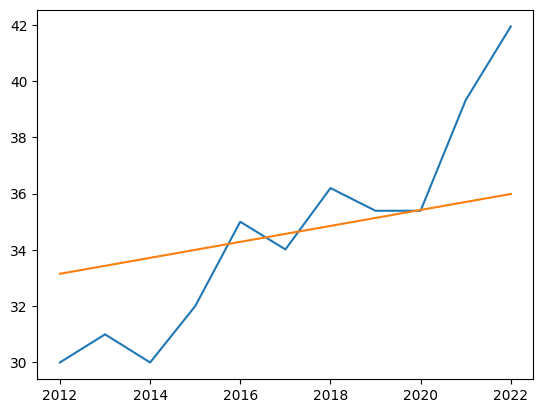

In [ ]:
df_demand['predicted_val'] = linreg_modeld.predict(X)
act_poultry = df_demand.loc[df_demand.poultry_meat == 1, "VALUE"]
pred_poultry = df_demand.loc[df_demand.poultry_meat == 1, "predicted_val"]

plt.plot(dfsd.Year.unique(), act_poultry)
plt.plot(dfsd.Year.unique(), pred_poultry)